# Week 2 GRAPPA Seminar Assignment

In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

Create a cell that converts all the units into natural units.

In [2]:
# length
cm = 1
m = 1e2 * cm
km = 1e3 * m
pc = 3.1e18 * cm
Mpc = 1e6 * pc
kpc = 1e3 * pc

# time
s = 1

# speed
c = 3e10 * cm/s

# mass/energy
GeV = 1
eV = 1e-9 * GeV
kg = 5.61e26 * GeV
M_solar = 2e30 * kg

## 1. What are the estimates of r$_{s}$ and $\rho_{s}$ for the Milky-Way Halo?

The Milky-Way halo has a mass of around 10$^{12}$ solar masses.

In [3]:
M = 1e12*M_solar
a_0 = 1
h = 0.7
H_0 = h * 100 * km * s**(-1) * Mpc**(-1)
Omega_m0 = 0.32
Omega_Lambda = 0.68
c_vir = 10

Define functions to calculate $\Omega_{\mathrm{m}}$, the Hubble constant H, $\Delta_{\mathrm{vir}}$, $\rho_{\mathrm{critical}}$, and r$_{\mathrm{vir}}$ in order to obtain values for r$_{s}$ and $\rho_{s}$.

In [4]:
def Omega_m(z):
    return Omega_m0*(1+z)**3 / (Omega_m0*(1+z)**3 + Omega_Lambda)

def H(z):
    return np.sqrt(H_0**2 * (Omega_m(z) + Omega_Lambda))

def delta_vir(z):
    return 18*np.pi**2 + 82*(Omega_m(z) - 1) - 39*(Omega_m(z) - 1)**2

def rho_c(z):
    return 2.775e11*h**2*M_solar/Mpc**3

def r_vir(z):
    return (3*M)**(1/3) / (4*np.pi*delta_vir(z)*rho_c(z))**(1/3)

def r_s(z):
    return r_vir(z) / c_vir

def rho_s(z):
    denominator = np.log(1 + c_vir) - (c_vir/(1 + c_vir))
    return M / (denominator*4*np.pi*r_s(z)**3)

## 2. How does $dJ/dΩ$ look like as a function of angle subtending from the Galactic center $\psi$?

In [11]:
def rho(l,z,subt_angle,theta):

    # NFW density profile: spatial mass distribution
    # of DM fitted to DM halos from N-body simulations

    d_gc = 8 * kpc                                                               #distance galactic centre (GC)
    r    = np.sqrt(-2*l*d_gc*np.cos(subt_angle)*np.cos(theta) + d_gc**2 + l**2)  #distance observed point from GC

    return rho_s(z)/((r/r_s(z))*(r/r_s(z)+1)**2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  if __name__ == '__main__':


Text(0, 0.5, 'dJ/d$\\Omega$')

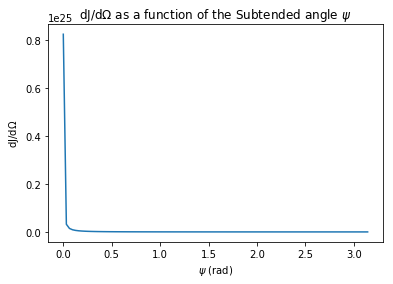

In [12]:
l_max = 1e2 * kpc                                                                #line of sight integration distance 
z     = 0                                                                        #redshift
theta = 0
subt_angle = np.linspace(0, np.pi, 100)                                          #subtended angle
rho_2 = np.vectorize(lambda l,z,subt_angle,theta: rho(l,z,subt_angle,theta)**2)  #density profile squared


#integration of dJdΩ over the line of sight
dJdΩ_func = np.vectorize(lambda z,subt_angle,theta: scipy.integrate.quad(rho_2, 0, l_max, args=(z,subt_angle,theta))[0])

plt.plot(subt_angle, dJdΩ_func(z,subt_angle,theta))
plt.title(r"dJ/d$\Omega$ as a function of the Subtended angle $\psi$")
plt.xlabel(r"$\psi$ (rad)")
plt.ylabel(r"dJ/d$\Omega$")

In [ ]:
l_max = 1e2 * kpc                                                                #line of sight integration distance 
z     = 0                                                                        #redshift
theta = np.linspace(0, 2*np.pi, 200)                                             #theta angle
subt_angle = np.linspace(0, np.pi, 100)                                          #subtended angle
rho_2 = np.vectorize(lambda l,z,subt_angle,theta: rho(l,z,subt_angle,theta)**2)  #density profile squared


#integration of dJdΩ over the line of sight
dJdΩ_func = np.vectorize(lambda z,subt_angle,theta: scipy.integrate.quad(rho_2, 0, l_max, args=(z,subt_angle,theta))[0])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


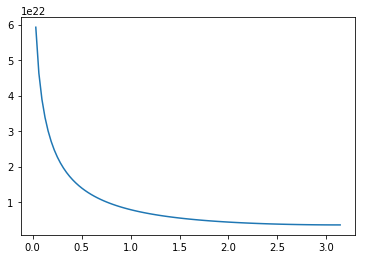

In [7]:
#tests

rho_2 = np.vectorize(lambda l,z,subt_angle: rho(l,z,subt_angle)**2)

y = np.vectorize(lambda x: x**2)
y(((2, 4, 5), (145, 27, 6)))

a = np.array((1, 2, 3, 4, 5))
b = np.array((1, 2, 3, 4, 5))
np.broadcast_arrays(a[None, :],b[:, None])

l = np.linspace(0, 10*kpc, 101)
angle = np.linspace(0, np.pi, 101)

plt.plot(angle,(rho(l[None, :-1], 0, angle[:, None]) * (l[1:]-l[:-1])[None, :]).sum(axis=1))